In [3]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

import scipy
from scipy import signal
import h5py, time
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later
import glob
import pandas as pd
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import load_dir_sorted
from bisect import bisect_left
from tqdm import tqdm


In [4]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"]=(36)

In [5]:
def create_plot(x,y,xlim=130,ylim_factor=5):
    ylim_low=np.min(y)/ylim_factor
    ylim_up=np.max(y)*ylim_factor    
    _,ax = plt.subplots()
    ax.semilogy(x,y, '.-', label="x",markersize=1,linewidth=0.5)
    ax.legend()
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('PSD [a.u.]')
    plt.xlim(1,xlim)
    plt.ylim(ylim_low,ylim_up)
    plt.grid(True)
    plt.show()

In [130]:
def get_harmonics(input_psd,shake_freq,no_harmonics,res_factor=10,plot=False):
    harmonics = []
    FreqTF = np.arange(shake_freq,(shake_freq*no_harmonics+shake_freq),shake_freq)
    for i in range(no_harmonics):
        harmonics.append(input_psd[shake_freq*res_factor*(i+1)])
    if(plot==True):
        plt.plot(FreqTF,harmonics, marker ="o", linestyle ="")
        plt.yscale("log")
        #plt.show()
    return FreqTF,harmonics     

In [131]:
def plot_basics(folder_basic,Data_File_Number,axis='x',mode="psd_only",max_file=5,res=50000,fsamp=5000,save_files=True):
    folder_shaking = "/Shaking/" + "/Shaking%d/" % Data_File_Number
    folder = folder_basic + folder_shaking
    files = load_dir(folder, file_prefix = 'Shaking', max_file=max_file)
    if(mode=="psd_only"):
        for i in range(len(files)):
            data = files[i].xyz2
            data_det=signal.detrend(data)
            x=data_det[0]
            y=data_det[1]
            z=data_det[2]
            res = res
            fsamp = fsamp # stays hard coded for now
            xpsd, freqs = matplotlib.mlab.psd(x, Fs = fsamp, NFFT = res)
            ypsd, freqs = matplotlib.mlab.psd(y, Fs = fsamp, NFFT = res)
            zpsd, freqs = matplotlib.mlab.psd(z, Fs = fsamp, NFFT = res)
            if(axis=="x"):
                create_plot(freqs,xpsd)
            else: print("not implemented")    
        return freqs,xpsd 
    if(mode=="harmonics"):
        harmonic_list=[]
        for i in range(len(files)):
            data = files[i].xyz2
            data_det=signal.detrend(data)
            x=data_det[0]
            y=data_det[1]
            z=data_det[2]
            res = res
            fsamp = fsamp # stays hard coded for now
            xpsd, freqs = matplotlib.mlab.psd(x, Fs = fsamp, NFFT = res)
            ypsd, freqs = matplotlib.mlab.psd(y, Fs = fsamp, NFFT = res)
            zpsd, freqs = matplotlib.mlab.psd(z, Fs = fsamp, NFFT = res)
            freqs,harmonics = get_harmonics(axis,shake_freq=13,no_harmonics=10)
            harmonic_list.append(harmonics)
        return harmonic_list      

In [132]:
Year = "2019"
Month = "11"
Day = "14"
BeadNumber =1
folder_basic = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day + "/Bead"+str(BeadNumber)

In [137]:
Data_File_Number=25
fname = folder_basic+"/Shaking"+"/Shaking%d" % Data_File_Number + "/Shaking%d_1.h5" % Data_File_Number
#fname = folder+"/NoBead"+"/InitialTest"+"/Data%d.h5" % Data_File_Number
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
fsamp=5000
#res = 2**12
res=50000
data=BDF.xyz
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]
xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)
freqs1,harmonics = get_harmonics(xpsd,shake_freq=13,no_harmonics=15,res_factor=10)


/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking25/Shaking25_1.h5


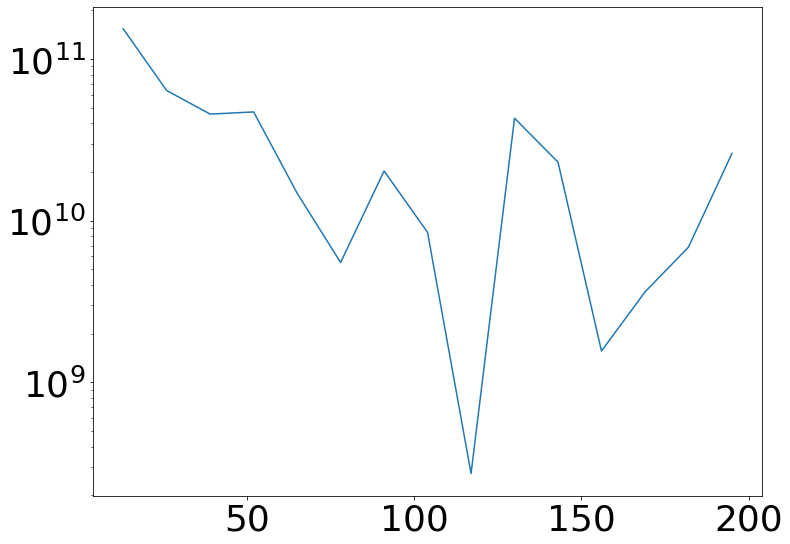

In [138]:
plt.plot(freqs1,harmonics)
plt.yscale("log")

300.0 maximum x
540.0 maximum y
536.6268217353297 minimum x
391.53819004198084 minimum y


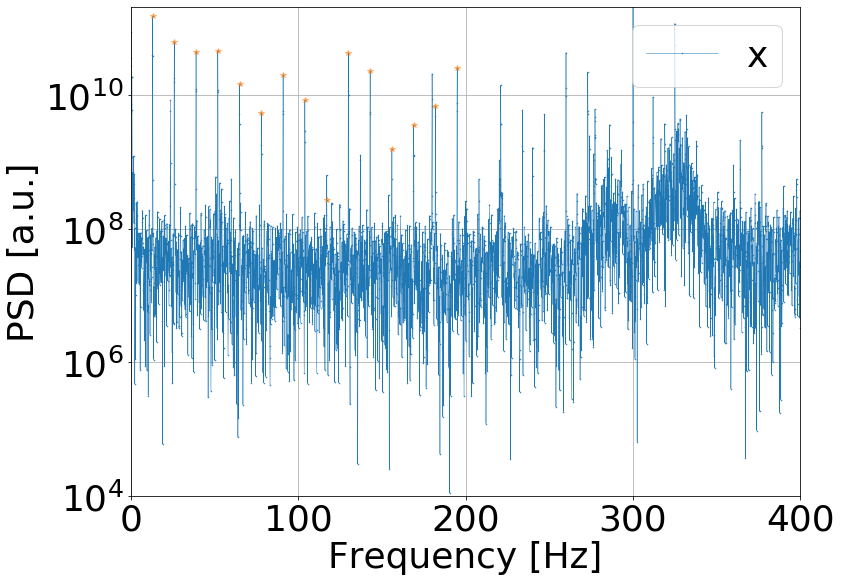

In [139]:
_,ax = plt.subplots()
ax.semilogy(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.semilogy(freqs1,harmonics,alpha=0.5,marker="*",linestyle="")
#ax.semilogy(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
#ax.semilogy(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(0,400)
plt.ylim(1e4,1/10*np.max(ypsd))
plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")


In [140]:
height_list = [42,42,42,50,42,42,50,42,40,40,40,42,42,42,42,42,42]
voltage_shield = [-5,-8.375,-10,-12,-12,-14,-14,-10,-10,-10,-10,-10,-10,-14,-14,-14,-14]
files_of_interest = [1,5,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]



In [141]:
folder_shaking = "/Shaking/"
folder = folder_basic + folder_shaking
files = load_dir_sorted(folder, file_prefix = 'Shaking', max_file=25)
harmonic_list =[]
for i in files_of_interest:
    print(files[i-1].fname)
    data = files[i-1].xyz2
    data_det=signal.detrend(data)
    x=data_det[0]
    y=data_det[1]
    z=data_det[2]
    res = res
    fsamp = 5000 # stays hard coded for now
    xpsd, freqs = matplotlib.mlab.psd(x, Fs = fsamp, NFFT = res)
    ypsd, freqs = matplotlib.mlab.psd(y, Fs = fsamp, NFFT = res)
    zpsd, freqs = matplotlib.mlab.psd(z, Fs = fsamp, NFFT = res)
    freqs,harmonics = get_harmonics(xpsd,shake_freq=13,no_harmonics=10)
    harmonic_list.append(harmonics)


23  files in folder
23  files loaded
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking1_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking5_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking9_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking10_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking11_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking12_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking13_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking14_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking15_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking16_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking17_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/Shaking/Shaking18_0.h5
/home/data_transfer/data_from_windows/20191114/Bead1/S

In [142]:
sum_list = []
mean_list=[]
std_list = []
for entry in harmonic_list:
    sum_list.append(np.sum(entry))
    mean_list.append(np.mean(entry))
    std_list.append(np.std(entry))

In [143]:
plot_height_test = np.arange(1,len(files_of_interest)+1,1)

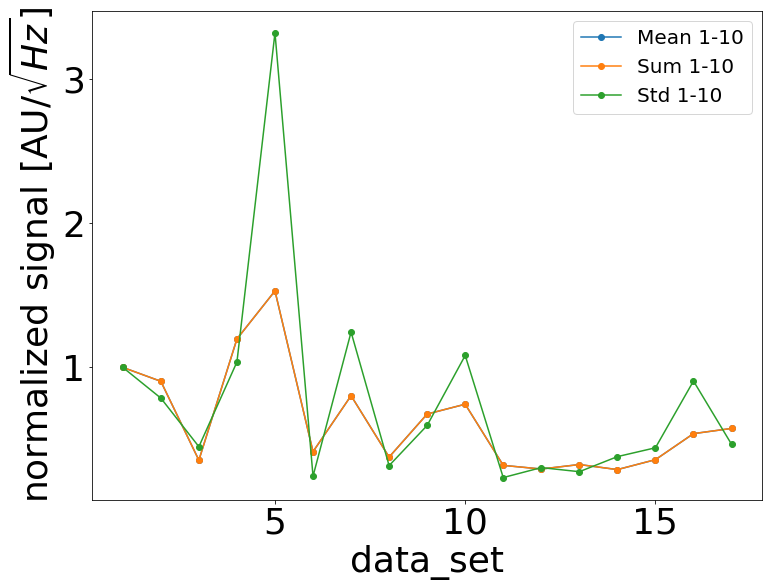

'\nShaking 1 y 2V amp, 13 Hz, 100 s\nShaking 5 as before, z is -8.375 V\nShaking 9 as before, z i -10V (30s)\nShaking 10 z -12 V, 30 s aerotech z is 50 um\nShaking 11 z -12 V, 30 s, aerotech z is 42 um. \nShaking 12,13 z -14\nShaking 14 z -10 V aerotech z is 50 um\nShaking 15 z -10 V, aerotech z is 42 um\nShaking 16,17 z -10 V, aerotech z is 40 um\nShaking 18,19 y center is 218 um\nShaking 20,21 z -14 V, aerotech z 42 um, aerotech x 360.5. \nShaking 22,23 aerotech x 365.5 um\n'

In [144]:
plt.plot(plot_height_test,mean_list/mean_list[0],marker="o",linestyle="-", label="Mean 1-10")
plt.plot(plot_height_test,sum_list/sum_list[0],marker="o",linestyle="-", label="Sum 1-10")
plt.plot(plot_height_test,std_list/std_list[0],marker="o",linestyle="-", label="Std 1-10")

plt.ylabel(r"normalized signal [AU/$\sqrt{Hz}$]")
plt.xlabel("data_set")
#plt.yscale("log")
plt.legend(fontsize=20)
#plt.savefig("Results/height_campaign.png", dpi=300, bbox_inch ="tight")
plt.show()
"""
Shaking 1 y 2V amp, 13 Hz, 100 s
Shaking 5 as before, z is -8.375 V
Shaking 9 as before, z i -10V (30s)
Shaking 10 z -12 V, 30 s aerotech z is 50 um
Shaking 11 z -12 V, 30 s, aerotech z is 42 um. 
Shaking 12,13 z -14
Shaking 14 z -10 V aerotech z is 50 um
Shaking 15 z -10 V, aerotech z is 42 um
Shaking 16,17 z -10 V, aerotech z is 40 um
Shaking 18,19 y center is 218 um
Shaking 20,21 z -14 V, aerotech z 42 um, aerotech x 360.5. 
Shaking 22,23 aerotech x 365.5 um
"""

# Process files only for harmonics using psd

In [145]:
def harmonics_processor(folder,max_file=5,shake_freq=13,no_harmonics=10,fsamp=5000,res=50000,save_file=True):
    #path="/harmonics/"
    #try:
    #    os.mkdir(path)
    #except OSError:
    #    print ("Creation of the directory %s failed" % path)
    #else:
    #    print ("Successfully created the directory %s " % path)
    print("test")
    files = load_dir_sorted(folder, file_prefix = 'Shaking', max_file=max_file)
    harmonic_list =[]
    xmean_list = []
    ymean_list = []
    zmean_list = []
                    
    for i in tqdm(np.arange(0,max_file,1)):
        #print(files[i].fname)
        data = files[i].xyz2
        xmean_list.append(np.mean(files[i].x2))
        ymean_list.append(np.mean(files[i].y2))
        zmean_list.append(np.mean(files[i].z2))
        data_det=signal.detrend(data)
        x=data_det[0]
        y=data_det[1]
        z=data_det[2]
        res = res
        fsamp = fsamp # stays hard coded for now
        xpsd, freqs = matplotlib.mlab.psd(x, Fs = fsamp, NFFT = res)
        ypsd, freqs = matplotlib.mlab.psd(y, Fs = fsamp, NFFT = res)
        zpsd, freqs = matplotlib.mlab.psd(z, Fs = fsamp, NFFT = res)
        freqs,harmonics = get_harmonics(xpsd,shake_freq=shake_freq,no_harmonics=no_harmonics)
        harmonic_list.append(harmonics)
    df = pd.DataFrame(harmonic_list)
    df["xmean"]=xmean_list
    df["ymean"]=ymean_list
    df["zmean"]=zmean_list
    if(save_file==True):
        df.to_csv(folder+"harmonics/harmonics_1000.csv",index=False)
    return df

In [106]:
folder_shaking = "/Shaking/Shaking25/"
folder = folder_basic + folder_shaking
df_shaking25 = harmonics_processor(folder,max_file=1000,shake_freq=13,no_harmonics=15)

test


  0%|          | 5/1000 [00:00<00:24, 41.10it/s]

1000  files in folder
1000  files loaded


100%|██████████| 1000/1000 [00:21<00:00, 44.98it/s]


In [107]:
folder_shaking = "/Shaking/Shaking26/"
folder = folder_basic + folder_shaking
df_shaking26 = harmonics_processor(folder,max_file=1000,shake_freq=13,no_harmonics=15)

test


  0%|          | 5/1000 [00:00<00:20, 47.87it/s]

1000  files in folder
1000  files loaded


100%|██████████| 1000/1000 [00:24<00:00, 40.63it/s]


In [ ]:
folder_shaking = "/Shaking/Shaking27/"
folder = folder_basic + folder_shaking
df_shaking27 = harmonics_processor(folder,max_file=1000,shake_freq=13,no_harmonics=15)

test


In [ ]:
folder_shaking = "/Shaking/Shaking28/"
folder = folder_basic + folder_shaking
df_shaking28 = harmonics_processor(folder,max_file=1000,shake_freq=13,no_harmonics=15)

In [81]:
folder_shaking = "/Shaking/Shaking25/"
folder = folder_basic + folder_shaking
df_shaking25 = pd.read_csv(folder+"harmonics/harmonics_1000.csv")

In [82]:
def get_mean_std_sum_of_harmonics(df,no_harmonics=10):
    mean_list = []
    std_list = []
    sum_list = []
    for i in np.arange(0,no_harmonics,1):
        std_list.append(np.std(df["%d" %i]))
        mean_list.append(np.mean(df["%d" % i])) 
        sum_list.append(np.sum(df["%d" %i]))
    return mean_list,std_list,sum_list    

In [83]:
mean24,std24, sum24 = get_mean_std_sum_of_harmonics(df_shaking24,no_harmonics=15)
mean25,std25, sum25 = get_mean_std_sum_of_harmonics(df_shaking25,no_harmonics=15)
mean26,std26, sum26 = get_mean_std_sum_of_harmonics(df_shaking26,no_harmonics=15)
mean27,std27, sum27 = get_mean_std_sum_of_harmonics(df_shaking27,no_harmonics=15)
mean28,std28, sum28 = get_mean_std_sum_of_harmonics(df_shaking28,no_harmonics=15)




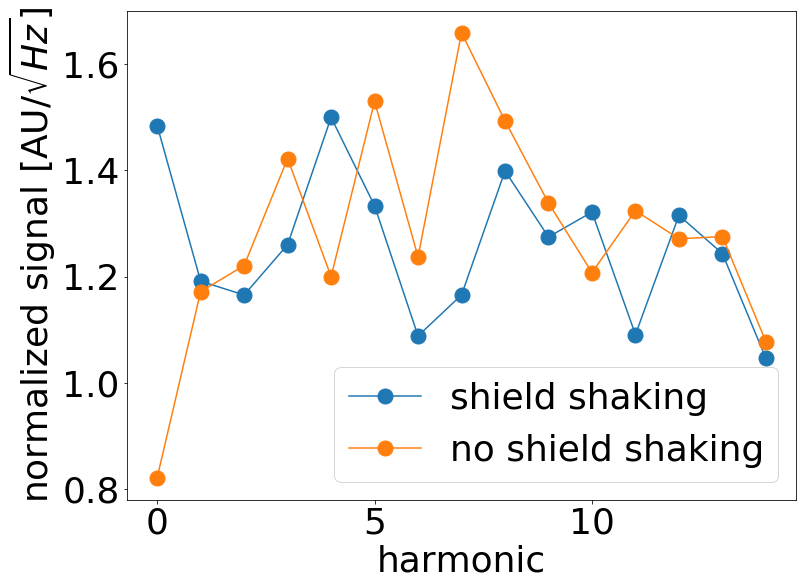

In [84]:
plt.plot(np.arange(0,15,1),np.divide(std24,mean24),marker="o",linestyle="-", markersize="15",label ="shield shaking")
plt.plot(np.arange(0,15,1),np.divide(std25,mean25),marker="o",linestyle="-",markersize="15", label = "no shield shaking")
#plt.plot(np.arange(0,15,1),np.divide(mean26,std26),marker="o",linestyle="", label = "servo on")
#plt.plot(np.arange(0,15,1),np.divide(mean27,std27),marker="o",linestyle="", label = "no servo")
#plt.plot(np.arange(0,15,1),np.divide(std28,mean28),marker="o",linestyle="",markersize="15", label = "no shaking")
plt.legend()
plt.ylabel(r"normalized signal [AU/$\sqrt{Hz}$]")
plt.xlabel("harmonic")
plt.show()

In [ ]:
plt.plot(np.arange(0,15,1),std24,marker="o",linestyle="",  markersize="15", label ="shield shaking")
plt.plot(np.arange(0,15,1),std25,marker="o",linestyle="",  markersize="15", label = "no shield shaking")
#plt.plot(np.arange(0,15,1),std26,marker="o",linestyle="", label = "servo on")
#plt.plot(np.arange(0,15,1),std27,marker="o",linestyle="", label = "no servo")
plt.plot(np.arange(0,15,1),std28,marker="o",linestyle="",  markersize="15", label = "no shaking")
plt.ylabel("NSD [AU/$\sqrt{Hz}$]")
plt.xlabel("harmonic")
plt.legend(fontsize=24, loc=8)
plt.yscale("log")
plt.savefig("Results/std_dev.png", dpi=300, bbox_inches ="tight")
plt.show()

In [ ]:
plt.plot(np.arange(0,15,1),sum24,marker="o",linestyle="",  markersize="15",label ="shield shaking")
plt.plot(np.arange(0,15,1),sum25,marker="o",linestyle="", markersize="15", label = "no shield shaking")
#plt.plot(np.arange(0,15,1),sum26,marker="o",linestyle="", label = "servo on")
#plt.plot(np.arange(0,15,1),sum27,marker="o",linestyle="", label = "no servo")
plt.plot(np.arange(0,15,1),sum28,marker="o",linestyle="",  markersize="15",label = "no shaking")
plt.ylabel("NSD [AU/$\sqrt{Hz}$] ")
plt.xlabel("harmonic")
plt.legend(fontsize=24, loc=8)
plt.yscale("log")
plt.savefig("Results/sum.png", dpi=300, bbox_inches ="tight")
plt.show()

In [ ]:
for i in np.arange(0,15,1):
    harmonic = i
    plt.plot(df_shaking26["%d" %harmonic], label = "servo (50um)")
    plt.plot(df_shaking27["%d" %harmonic], label = "no servo (50um)",alpha=0.5)
    plt.legend()
    plt.ylabel(r"NSD [AU/$\sqrt{Hz}$]")
    plt.xlabel("data_set")
    plt.yscale("log")
    plt.savefig("Results/%d_harmonic_servo.png" %harmonic, dpi=300, bbox_inches ="tight")
    plt.show()

In [ ]:
for i in np.arange(0,15,1):
    harmonic = i
    plt.plot(df_shaking24["%d" %harmonic], label = "shield")
    plt.plot(df_shaking25["%d" %harmonic], label = "no shield",alpha=0.5)
    plt.plot(df_shaking28["%d" %harmonic], label = "no shaking no shield")
    plt.legend()
    plt.ylabel(r"NSD [AU/$\sqrt{Hz}$]")
    plt.xlabel("data_set")
    plt.yscale("log")
    plt.savefig("%d_harmonic.png" %harmonic, dpi=300, bbox_inch ="tight")
    plt.show()